In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import PIL.Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/tsr_dataset.zip -d /content/drive/MyDrive/tsrdataset

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00014.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00015.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00016.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00017.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00018.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00019.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00020.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00021.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00022.png  
 extracting: /content/drive/MyDrive/tsrdataset/tsr_dataset/Train/5/00005_00053_00023.png  
 extracting: /content/drive/MyDrive/tsr

In [20]:
data = []
labels = []
classes = 43
%cd /content/drive/MyDrive/tsrdataset/tsr_dataset
cur_path = os.getcwd()

/content/drive/MyDrive/tsrdataset/tsr_dataset


In [21]:
print(cur_path)

/content/drive/MyDrive/tsrdataset/tsr_dataset


In [24]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [25]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [26]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [27]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [28]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

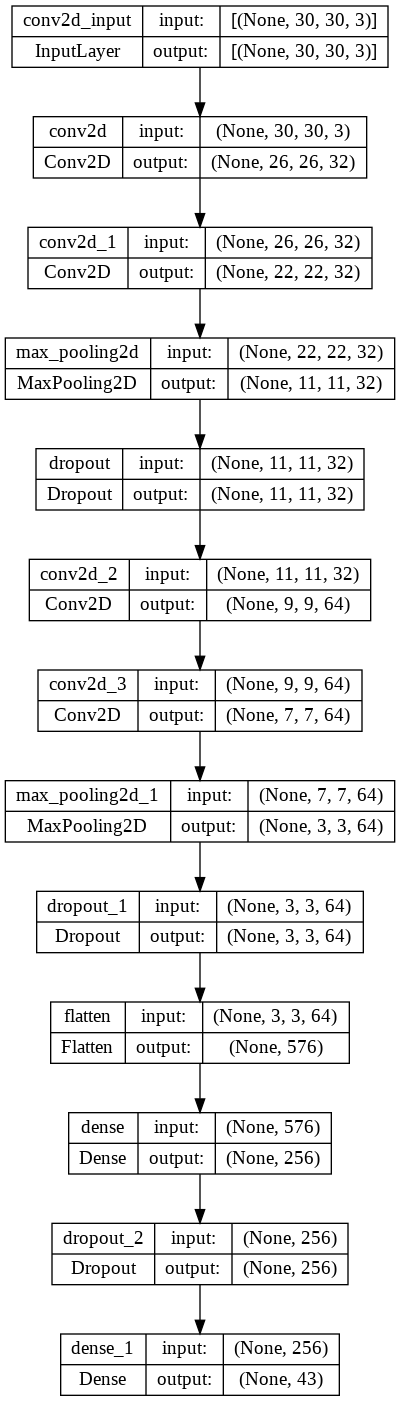

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/5
981/981 [==============================] - 157s 159ms/step - loss: 1.5828 - accuracy: 0.6127 - val_loss: 0.1903 - val_accuracy: 0.9514
Epoch 2/5
981/981 [==============================] - 153s 156ms/step - loss: 0.4075 - accuracy: 0.8885 - val_loss: 0.1104 - val_accuracy: 0.9704
Epoch 3/5
981/981 [==============================] - 149s 152ms/step - loss: 0.3011 - accuracy: 0.9192 - val_loss: 0.0706 - val_accuracy: 0.9829
Epoch 4/5
981/981 [==============================] - 148s 151ms/step - loss: 0.2357 - accuracy: 0.9359 - val_loss: 0.0480 - val_accuracy: 0.9887
Epoch 5/5
981/981 [==============================] - 155s 158ms/step - loss: 0.2279 - accuracy: 0.9406 - val_loss: 0.1241 - val_accuracy: 0.9644


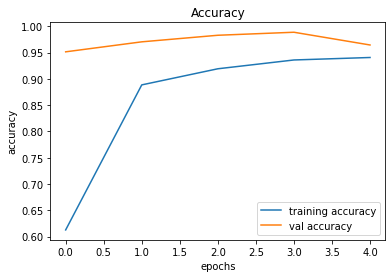

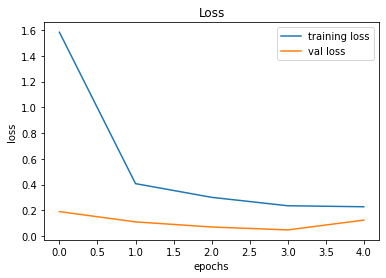

In [20]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
#pred = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))

395/395 [==============================] - 13s 32ms/step
0.928424386381631


In [28]:
model.save('tsr_classifier.h5')

In [102]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#load the trained model to classify sign
from keras.models import load_model
model = load_model('tsr_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

def classify(file_path):
    global label_packed
    image = PIL.Image.open(file_path)
    image = image.resize((30,30))
    imgplot = plt.imshow(image)
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred=model.predict([image])[0]
    pclass=np.argmax(pred,axis=0)
    sign = classes[pclass+1]
    print(sign)

1/1 [==============================] - 0s 20ms/step
Speed limit (60km/h)


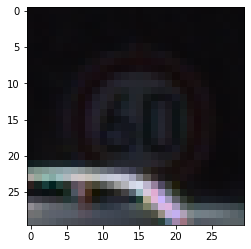

In [109]:
classify("/content/drive/MyDrive/tsrdataset/tsr_dataset/Test/00023.png")